# UE 10 Strommarktmodell
## Ziele der Übung: Optimierungsmodell für den Kraftwerkseinsatz entwickeln
### Anforderungen
- Basic Model: Kostenoptimale Versorgung der Kunden
- Keine Repräsentation des Netzes: Strommarktmodel
- Parameter: Kosten, Leistung, Emissionen
- Betrachtung einer Periode
- Erweiterung: Betrachtung mehrerer Perioden


In [116]:
#Import Packages
from gurobipy import *
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

## Modell Kraftwerkseinsatz


#### Grundlegende Parameter der Kraftwerke und der Nachfrage

In [117]:
#Definition der Parameter des Modells

#Leistung der Kraftwerke


#Kosten der Kraftwerke
#fix

# variabel


#### Kraftwerksemissionen

- Annahme: Ein Steinkohle und ein Gaskraftwerk
- Einfügen von Emissionen (https://www.volker-quaschning.de/datserv/CO2-spez/index.php)


In [118]:
#Emissionsfaktoren

#CO2-Kosten für Zertifikate


#### Nachfrage

In [119]:
#Nachfrage


#### Weiterentwicklung des Modells: 
- Erweiterung auf mehrere Perioden

### Anlegen des Modells

In [120]:
#Create Model
M = Model('Kraftwerkseinsatz') 

### Add Variables

In [121]:
# Definition der Variablen
# start with KW1
x1 = M.addVar()

# continue with KW2


#### Kraftwerksemissionen

In [122]:
#Variablen für die Emissionen
#Gesamt-CO2-emissionen

#CO2 Emissionen von Kraftwerk 1 in Periode 1

#CO2 Emissionen von Kraftwerk 2 in Periode 1


### Add Constraints
- Definition der Nebenbedingungen


In [136]:
#Minimale Leistung der Krafwerke
M.addConstr()

#Maximale Leistung der Krafwerke


M.update()

In [137]:
#Nachfrage

M.update()

In [138]:
#Nichtnegativität

M.update()

In [139]:
# Emissionen


# Emissionslimit

M.update()

#### Weiterentwicklung des Modells: 
- Erweiterung auf mehrere Perioden

In [125]:
#Definition der Nebenbedingungen für folgende Perioden


### Set Objective

In [126]:
#Aufstellen der Zielfunktion
#Minimierung der Kosten

#Option A) Einperiodige Betrachtung ohne CO2-Emissionen

#Option B) Einperiodige Betrachtung mit CO2-Emissionen
M.setObjective()

#Option C) Betrachtung über mehrere Perioden

#Option D) Zusätzliche Berücksichtigung der CO2-Emissionen               


### Modell optimieren

In [127]:
M.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: Intel Core Processor (Haswell, no TSX), instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 4 columns and 14 nonzeros
Model fingerprint: 0xd6274c59
Coefficient statistics:
  Matrix range     [3e-01, 1e+00]
  Objective range  [9e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 1e+02]
Presolve removed 10 rows and 4 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.4607143e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  8.460714286e+03


### Ergebnisse auslesen


In [128]:
#Attribute verschieden von Null ausgeben lassen
M.printAttr('X')


    Variable            X 
-------------------------
  Output KW1      54.4643 
  Output KW2      30.5357 
Emissionen KW1      34.3125 
Emissionen KW2      10.6875 


In [129]:
## get results from Optimization
values = []
names = []
# objVal = M.objVal
for v in M.getVars():
    values.append(v.X)
    names.append(v.VarName)
# return values, objVal
results = dict(zip(names, values))
results

{'Output KW1': 54.46428571428572,
 'Output KW2': 30.535714285714278,
 'Emissionen KW1': 34.31250000000001,
 'Emissionen KW2': 10.687499999999996}

In [130]:
# set dataframe for results
ts = 1 #timesteps
ppusage_df = pd.DataFrame(index=np.arange(0,ts,1), columns=['usage KW 1', 'usage KW 2'], data={'usage KW 1':values[:1],
                                                                                              'usage KW 2':values[1:2]
                                                                                             }
                         )

emissions_df = pd.DataFrame(index=np.arange(0,ts,1), columns=['emissions KW 1', 'emissions KW 2'], data={'emissions KW 1':values[2:3],
                                                                                                        'emissions KW 2':values[3:]
                                                                                                       }
                           )

In [131]:
ppusage_df

,usage KW 1,usage KW 2
0,54.464286,30.535714


In [132]:
emissions_df

,emissions KW 1,emissions KW 2
0,34.3125,10.6875


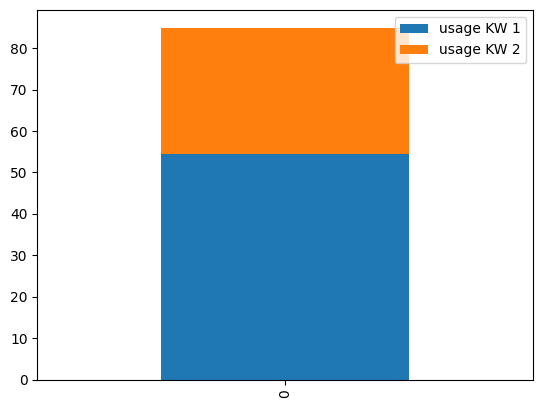

In [133]:
# visualize results, start with PP usage
ppusage_df.plot.bar(stacked=True)
plt.show()

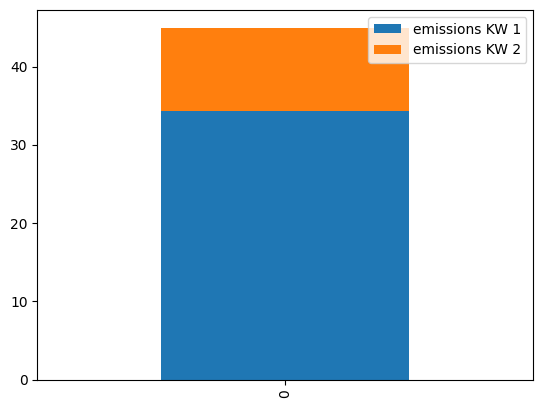

In [134]:
# visualize results, continue with emissions
emissions_df.plot.bar(stacked=True)
plt.show()